In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [26]:
data = pd.read_csv('../datasets/data.csv')

In [27]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [28]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [29]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
data = data.drop('id', axis=1)

In [31]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [32]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [33]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
data.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [35]:
'''
Kada radimo klasifikaciju, trebamo podatke da podelimo na ULAZNE i CILJANE atribute,
kao i podelu na TRENING(75%) i na TEST(25%) 
'''

'\nKada radimo klasifikaciju, trebamo podatke da podelimo na ULAZNE i CILJANE atribute,\nkao i podelu na TRENING(75%) i na TEST(25%) \n'

In [36]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [38]:
Y = data['diagnosis']

In [39]:
X = data.drop('diagnosis', axis=1)

In [40]:
feature_names = X.columns

In [41]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [42]:
# Provera balansiranosti klasa kod Y

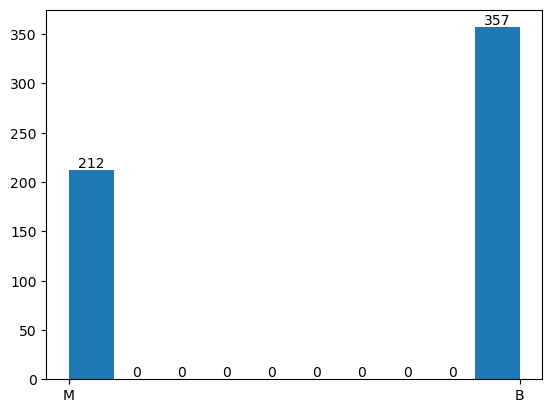

In [43]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [44]:
Y.replace('B', 0, inplace=True)

In [45]:
Y.replace('M', 1, inplace=True)

In [46]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [48]:
X_train.shape

(426, 30)

In [49]:
from sklearn.tree import plot_tree

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
def report(model, x, y, text='train'):
    print(f'{text}\t | \t {type(model).__name__}')
    print('-'*80)
    y_pred = model.predict(x)
    print(classification_report(y, y_pred))
    print('-'*80)
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))

In [52]:
def treePlot(model, feature_names, class_names):
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f'DecisionTreeClassifier with depth {model.get_depth()}')
    plt.show()

In [53]:
model_default = DecisionTreeClassifier()

In [54]:
model_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
report(model_default, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [56]:
report(model_default, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

--------------------------------------------------------------------------------
    B   M
B  85   5
M   2  51


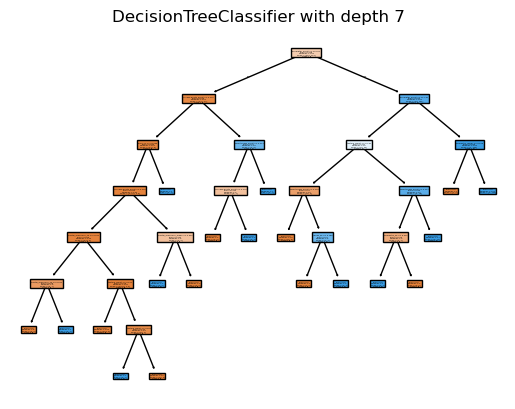

In [57]:
treePlot(model_default, feature_names, ['B', 'M'])

In [58]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=25, random_state=123)

In [59]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=25,
                       random_state=123)

In [60]:
report(model, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       267
           1       0.96      0.96      0.96       159

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426

--------------------------------------------------------------------------------
     B    M
B  260    7
M    6  153


In [61]:
report(model, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        90
           1       0.85      0.94      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

--------------------------------------------------------------------------------
    B   M
B  81   9
M   3  50


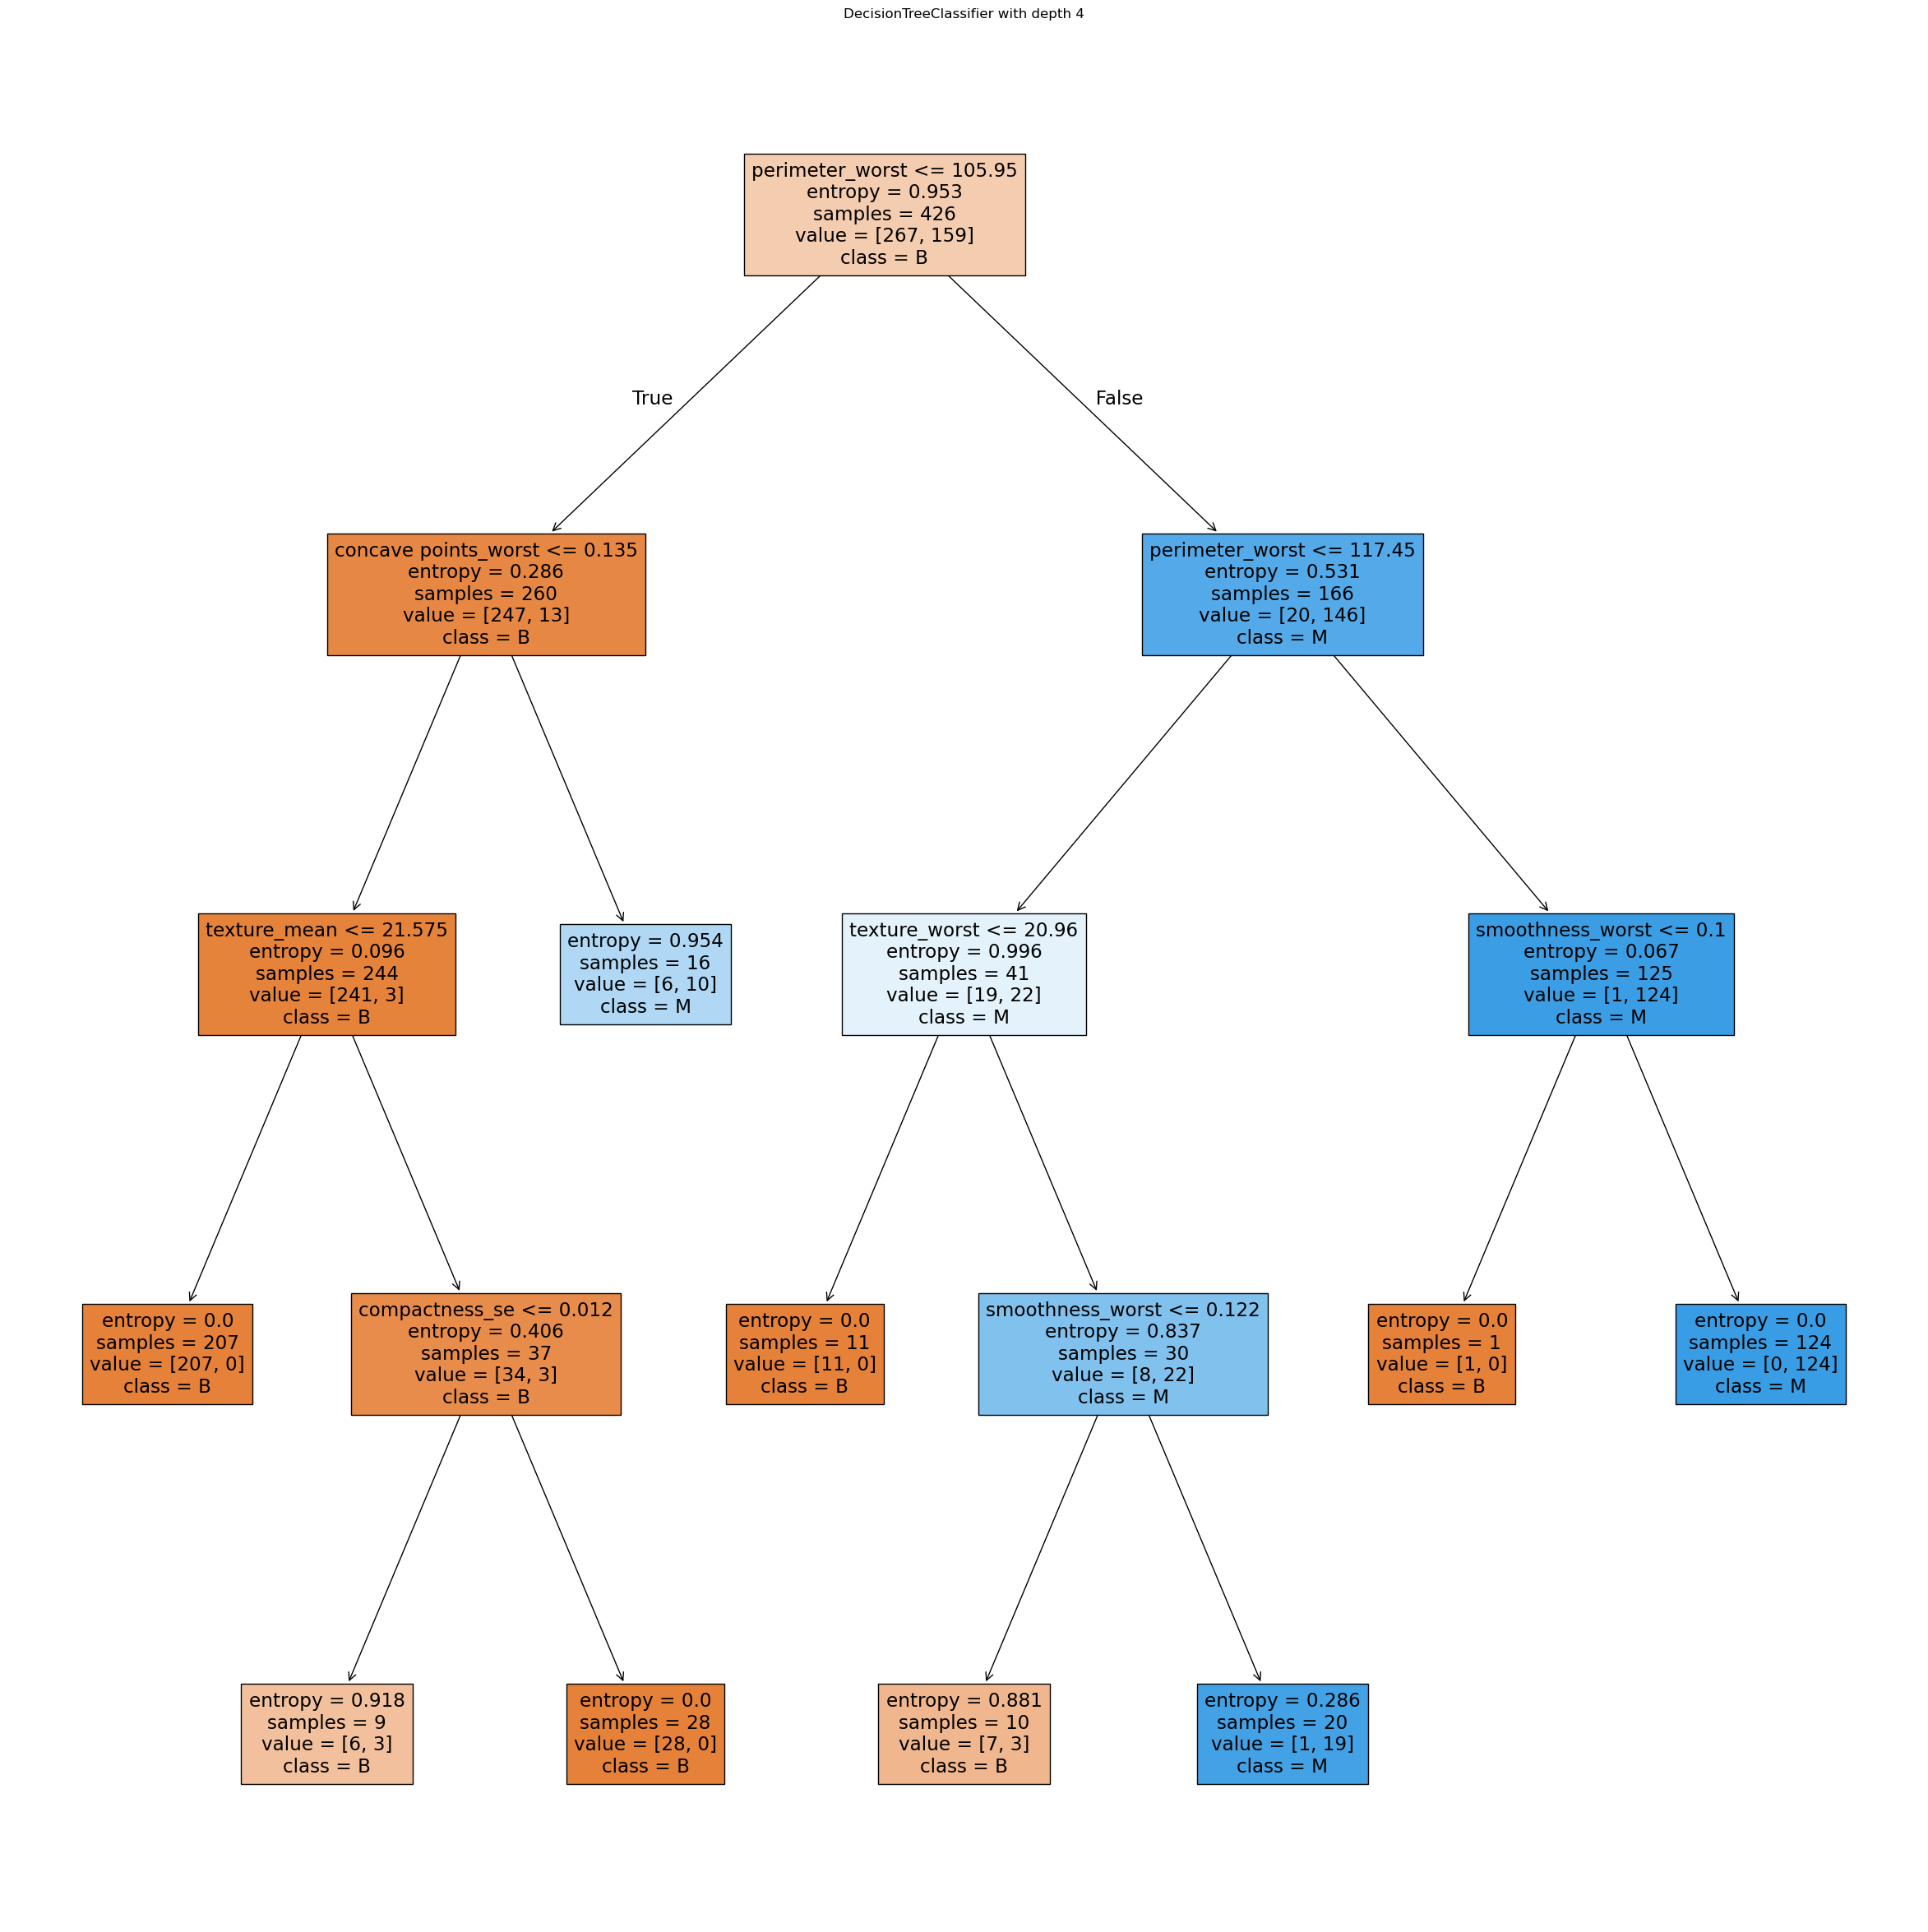

In [63]:
plt.figure(figsize=(30,30))
treePlot(model, feature_names, ['B', 'M'])

In [64]:
class_names = ['B', 'M']

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
params = {
    'max_depth': [2,4,6,8],
    'criterion': ['gini', 'entropy']
}

In [70]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, verbose=5)

In [71]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.942 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.906 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.871 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.929 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.942 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.941 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.918 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.906 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.941 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.942 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             verbose=5)

In [72]:
estimator.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [73]:
model = estimator.best_estimator_

In [74]:
report(model, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [75]:
report(model, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

--------------------------------------------------------------------------------
    B   M
B  85   5
M   2  51


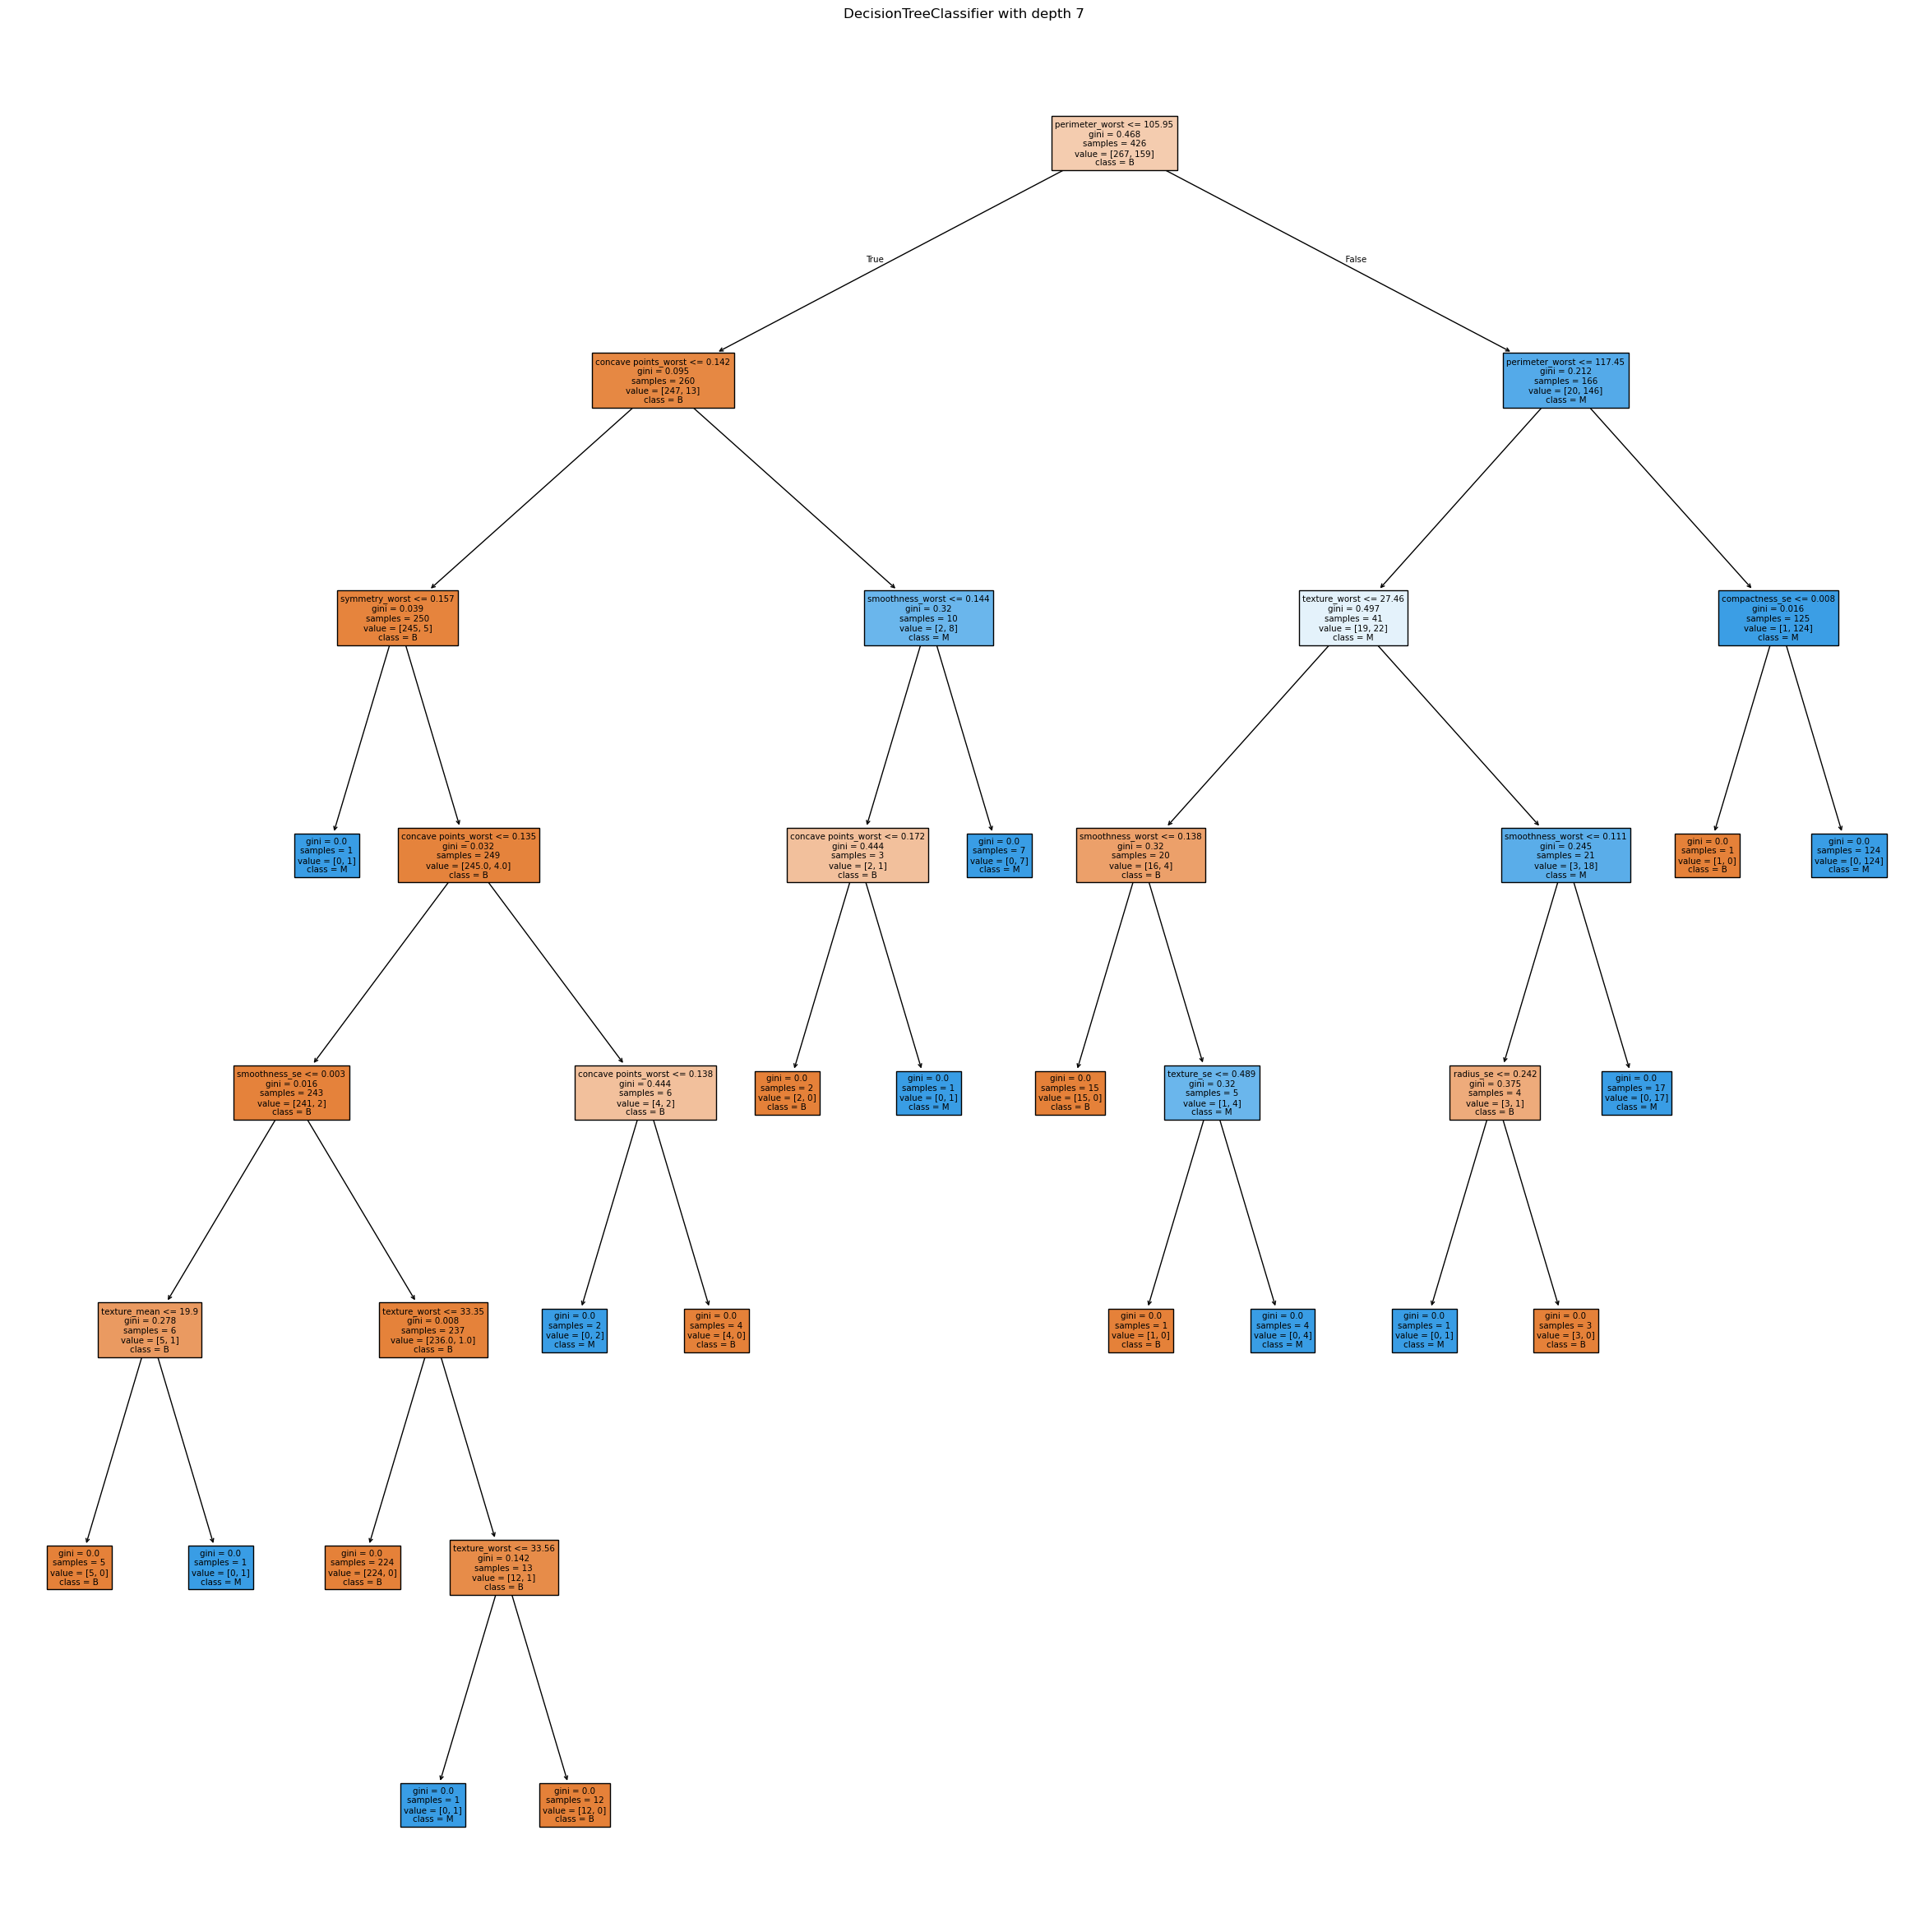

In [76]:
plt.figure(figsize=(30,30))
treePlot(model, feature_names, class_names)

In [77]:
# SLUCAJNE SUME = RandomForest

In [78]:
random_forest = RandomForestClassifier(n_estimators=2)

In [79]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [80]:
report(random_forest, X_train, y_train)

train	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------------------------------------
     B    M
B  266    1
M    8  151


In [81]:
report(random_forest, X_test, y_test, 'test')

test	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M   5  48


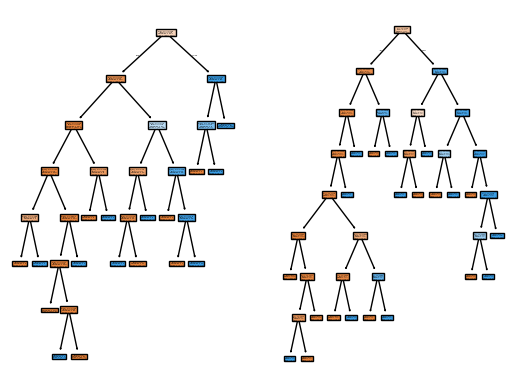

In [82]:
for i in range(1, len(random_forest.estimators_) + 1):
    plt.subplot(1, 2, i)
    plot_tree(random_forest.estimators_[i-1], filled=True)

In [83]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
report(random_forest, X_train, y_train)

train	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [86]:
report(random_forest, X_test, y_test)

train	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M   2  51
